# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jerilacson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient

In [4]:
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,"Mr. Spiekers most prominent customer, whom he ...",-0.2280,0.072,0.097,0.831
1,"You might have heard of crypto Twitter, the co...",-0.2732,0.000,0.057,0.943
2,German authorities have seized $25.2 million U...,0.0000,0.000,0.000,1.000
3,"Bitcoin hit a milestone Friday ""that gets the ...",-0.4215,0.000,0.076,0.924
4,"Other fund vehicles hold crypto directly, but ...",-0.1154,0.116,0.154,0.730


In [8]:
# Create the ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,Digital thieves just pulled off another major ...,-0.5106,0.000,0.102,0.898
1,"This week, the cryptocurrency network Ronin di...",-0.4215,0.051,0.098,0.851
2,April 5 (Reuters) - Ethereum blockchain scalin...,0.0000,0.000,0.000,1.000
3,His name is Vitalik Buterin and after dedicati...,0.0000,0.000,0.000,1.000
4,Regulatory solutions should be codified region...,0.7430,0.323,0.083,0.594


In [9]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.00000
mean,-0.028475,0.059100,0.058150,0.88280
std,0.420094,0.052015,0.061772,0.07438
min,-0.771300,0.000000,0.000000,0.73000
25%,-0.344025,0.000000,0.000000,0.84600
50%,0.000000,0.065000,0.046000,0.87950
75%,0.323650,0.091250,0.097250,0.92400
max,0.636900,0.171000,0.187000,1.00000


In [10]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.268215,0.09835,0.022000,0.879600
std,0.423916,0.11228,0.036636,0.130047
min,-0.510600,0.00000,0.000000,0.594000
25%,0.000000,0.00000,0.000000,0.818750
50%,0.085400,0.06650,0.000000,0.897500
75%,0.586700,0.17750,0.048500,1.000000
max,0.867600,0.32300,0.102000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a slightly higher mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score.

Q. Which coin had the highest positive score?

A: Bitcoin had the highest Positive score.

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [14]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,"Mr. Spiekers most prominent customer, whom he ...",-0.2280,0.072,0.097,0.831,"[Mr., Spiekers, prominent, customer, described..."
1,"You might have heard of crypto Twitter, the co...",-0.2732,0.000,0.057,0.943,"[might, heard, crypto, Twitter, corner, social..."
2,German authorities have seized $25.2 million U...,0.0000,0.000,0.000,1.000,"[German, authority, seized, 25.2, million, USD..."
3,"Bitcoin hit a milestone Friday ""that gets the ...",-0.4215,0.000,0.076,0.924,"[Bitcoin, hit, milestone, Friday, get, world, ..."
4,"Other fund vehicles hold crypto directly, but ...",-0.1154,0.116,0.154,0.730,"[fund, vehicle, hold, crypto, directly, theyre..."


In [15]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Digital thieves just pulled off another major ...,-0.5106,0.000,0.102,0.898,"[Digital, thief, pulled, another, major, crypt..."
1,"This week, the cryptocurrency network Ronin di...",-0.4215,0.051,0.098,0.851,"[week, cryptocurrency, network, Ronin, disclos..."
2,April 5 (Reuters) - Ethereum blockchain scalin...,0.0000,0.000,0.000,1.000,"[April, 5, Reuters, Ethereum, blockchain, scal..."
3,His name is Vitalik Buterin and after dedicati...,0.0000,0.000,0.000,1.000,"[name, Vitalik, Buterin, dedicating, cover, re..."
4,Regulatory solutions should be codified region...,0.7430,0.323,0.083,0.594,"[Regulatory, solution, codified, regionally, i..."


---

### Ngrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin.

1. Use the NLTK to produce the n-grams for N = 2.
2. List the top 10 words for each coin.

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'March'), 4),
 (('Reuters', 'Bitcoin'), 3),
 (('German', 'authority'), 2),
 (('25.2', 'million'), 2),
 (('million', 'USD'), 2),
 (('char', 'Bitcoin'), 2),
 (('char', 'SAN'), 2),
 (('SAN', 'SALVADOR'), 2),
 (('SALVADOR', 'March'), 2),
 (('Reuters', 'El'), 2),
 (('El', 'Salvador'), 2),
 (('March', '22'), 2),
 (('22', 'Reuters'), 2),
 (('Getty', 'Welcome'), 2),
 (('Welcome', 'Nonfungible'), 2),
 (('Nonfungible', 'Tidbits'), 2),
 (('Mr.', 'Spiekers'), 1),
 (('Spiekers', 'prominent'), 1),
 (('prominent', 'customer'), 1),
 (('customer', 'described'), 1)]

In [18]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'cryptocurrency'), 3),
 (('cryptocurrency', 'boom'), 3),
 (('boom', 'past'), 3),
 (('past', 'year'), 3),
 (('year', 'helped'), 3),
 (('helped', 'propel'), 3),
 (('propel', 'newer'), 3),
 (('newer', 'market'), 3),
 (('market', 'record'), 3),
 (('record', 'height'), 3),
 (('height', 'digital'), 3),
 (('digital', 'collectible'), 3),
 (('collectible', 'known'), 3),
 (('known', 'NFTs'), 3),
 (('NFTs', 'fact'), 3),
 (('fact', 'total'), 3),
 (('total', 'NFT'), 3),
 (('NFT', 'sale'), 3),
 (('sale', 'volume'), 3),
 (('volume', 'hit'), 3)]

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Bitcoin', 12),
 ('crypto', 8),
 ('March', 8),
 ('Reuters', 8),
 ('week', 6),
 ('million', 5),
 ('world', 5),
 ('bitcoin', 5),
 ('cryptocurrency', 4)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Ethereum', 7),
 ('cryptocurrency', 6),
 ('blockchain', 5),
 ('digital', 5),
 ('Reuters', 4),
 ('year', 4),
 ('past', 4),
 ('million', 3),
 ('Ronin', 3)]

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [23]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

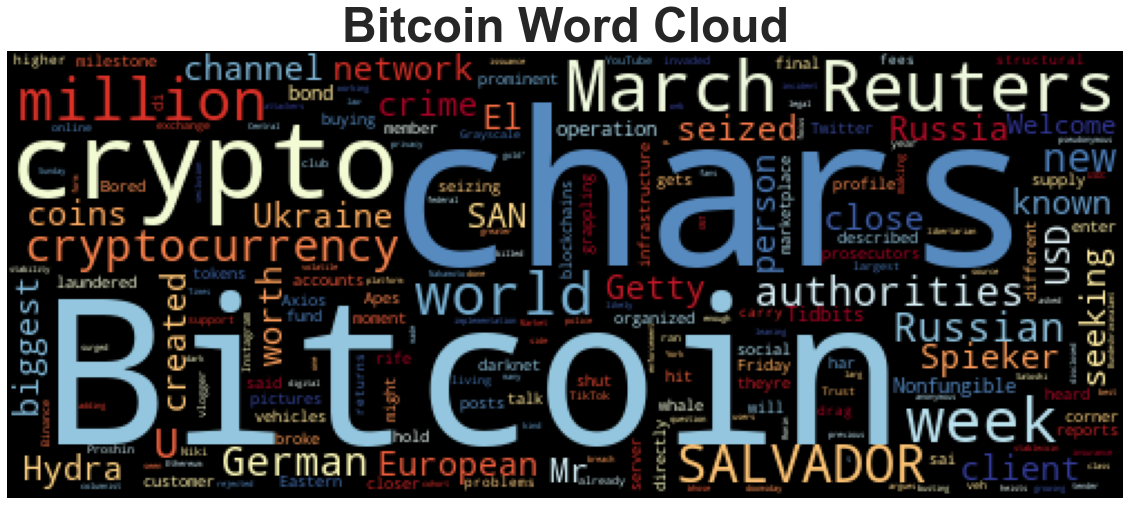

In [24]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

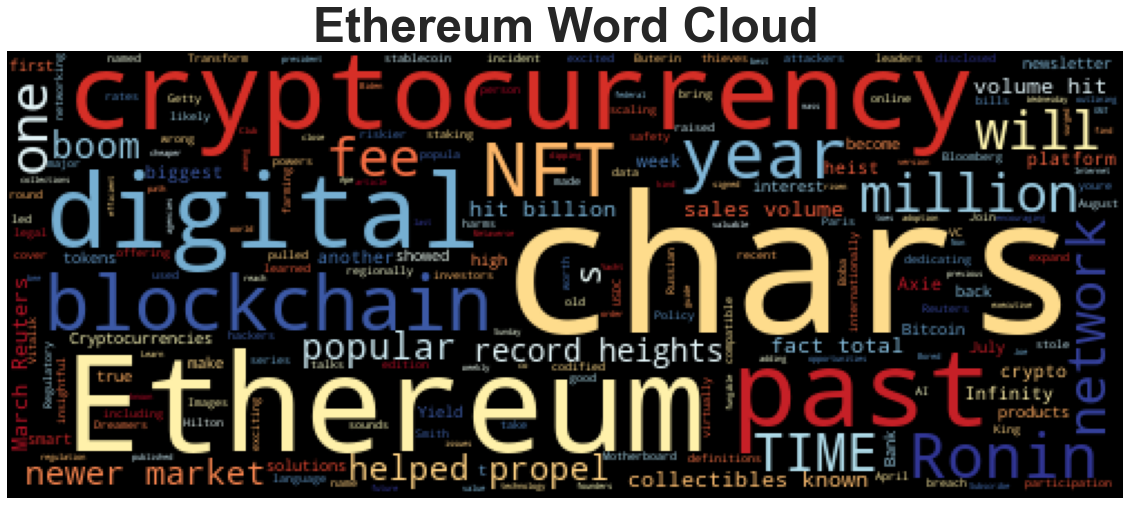

In [25]:
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy if needed
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

'Mr. Spiekers most prominent customer, whom he described as his whale client, was the Eastern European organized crime member, prosecutors said. Mr. Spieker laundered $620,000 for the client, they sai… [+2755 chars]You might have heard of crypto Twitter, the corner of the social network where accounts have Bored Apes as profile pictures, posts are rife with talk of tokens, blockchains, and buying the Bitcoin di… [+3133 chars]German authorities have seized $25.2 million USD in Bitcoin\r\nGerman authorities shut down the server infrastructure for the Russian darknet marketplace Hydra, seizing 23 million (~$25.2 million USD) … [+2344 chars]Bitcoin hit a milestone Friday "that gets the world ever closer to the moment when the final new bitcoin will enter the world," reports Axios. "The supply of coins broke 19 million...""Bitcoin is har… [+641 chars]Other fund vehicles hold crypto directly, but theyre grappling with different structural problems and carry higher fees, which are a drag on r

In [30]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [32]:
# List all Entities
# YOUR CODE HERE!# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Spiekers PERSON
Eastern European NORP
Spieker PERSON
620,000 MONEY
Twitter PRODUCT
Bored Apes PERSON
Bitcoin PERSON
$25.2 million MONEY
Bitcoin GPE
German NORP
Russian NORP
Hydra GPE
23 million CARDINAL
Friday DATE
Axios PERSON
19 million CARDINAL
Grayscale Bitcoin Trust ORG
Russia GPE
Ukraine GPE
Niki Proshin PERSON
a year DATE
YouTube ORG
TikTok ORG
Instagram ORG
Russian NORP
March 23 DATE
Reuters ORG
El Salvador GPE
Binance PERSON
Central ORG
the New York Times ORG
Ronin ORG
$540 million MONEY
Ethereum GPE
USDC ORG
27 CARDINAL
Reuters ORG
4.41% PERCENT
46,499.29 MONEY
Sunday DATE
1,963.64 MONEY
Bitcoin PERSON
41.1% PERCENT
Reuters ORG
Satoshi Nakamoto PERSON
2008 DATE
this week DATE
German NORP
US GPE
Hydra Market PERSON
+1524 ORG
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
+3275 ORG
this week DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
weekly DATE
this week DATE
March 31 DATE
Reuters ORG
European Union ORG
Thursday DATE
Mar

---

### Ethereum NER

In [33]:
# Concatenate all of the bitcoin text together
all_eth_text = eth.text.str.cat()
all_eth_text

"Digital thieves just pulled off another major crypto heist. Motherboard has learned hackers stole 173,600 Ethereum (about $591.2 million) from the Ronin blockchain that powers Axie Infinity, a popula… [+1462 chars]This week, the cryptocurrency network Ronin disclosed a breach in which attackers made off with $540 million worth of Ethereum and USDC stablecoin. The incident, which is one of the biggest heists in… [+3084 chars]April 5 (Reuters) - Ethereum blockchain scaling platform Boba Network raised $45 million in its series A round, with participation from investors including Will Smith-led Dreamers VC, Paris Hilton an… [+1335 chars]His name is Vitalik Buterin and after dedicating the cover of its most recent edition to him, TIME has named him the King of Cryptocurrencies .\r\nBloomberg | Getty Images\r\n The 28-year-old Russian is … [+2627 chars]Regulatory solutions should be codified regionally and internationally through compatible language and legal definitions. Policy solutions 

In [34]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [35]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [36]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Digital ORG
Motherboard PERSON
173,600 CARDINAL
Ethereum ORG
about $591.2 million MONEY
Ronin ORG
Axie Infinity GPE
Ronin ORG
$540 million MONEY
Ethereum GPE
USDC ORG
Reuters ORG
Boba Network PERSON
$45 million MONEY
Will Smith-led PERSON
Dreamers VC ORG
Paris Hilton PERSON
Vitalik Buterin PERSON
TIME ORG
Bloomberg GPE
Getty Images PERSON
28-year-old DATE
Russian NORP
Transform ORG
July 19 DATE
July 20 - August 3 DATE
6 MONEY
the last year DATE
Bored Ape Yacht Club ORG
one CARDINAL
Ethereum PERSON
the past few years DATE
NFT ORG
$24 billion MONEY
Biden PERSON
Wednesday DATE
first ORDINAL
TIME ORG
weekly DATE
Reuters ORG
4.41% PERCENT
46,499.29 MONEY
Sunday DATE
1,963.64 MONEY
Bitcoin PERSON
41.1% PERCENT
the past few years DATE
NFT ORG
$23 billion MONEY
the past few years DATE
NFT ORG
$23 billion MONEY
chars]If PERSON
Ethereum ORG
chars]NEW YORK GPE
March 21 DATE
Reuters ORG
a second straight week DATE
CoinShares ORG
Monday DATE
March 24 DATE
Reuters ORG
Leumi PERSON
first ORDINAL
Isra